In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [48]:
#Load Packages
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
from sklearn import metrics
import seaborn as sns
from yellowbrick.regressor import PredictionError, ResidualsPlot



In [3]:
#Import csv file and create data frame
#df = pd.read_csv(Path('..Resources/SP500&Gas.csv'))
#pd.read_csv('SP500 & Gas',encoding = "utf-8")
#kwds.update(kwds_defaults)
#return _read(r"C:\Users\lmeji\Desktop\Project_branch\Investing_Analysis\Resources\SP500&Gas.csv", kwds)
data = Path(r"C:\Users\lmeji\Desktop\Project_branch\Investing_Analysis\Resources\ExportingMainData_Gas_Stocks.csv")
data_df = pd.read_csv(data)
data_df.head()

,weekly_date,weekly_ending_stocks_of_gasoline,weekly_regular_retail_gasoline_prices,gspc_open,gspc_high,gspc_low,gspc_close,gspc_volume,gspc_adjusted,xom,cvx
0,36528,194173,1.272,1469.25,1478.00,1438.36,1455.22,931800000,1455.22,39.75,42.94
1,36535,198240,1.264,1441.47,1464.36,1441.47,1457.60,1064800000,1457.60,42.09,45.03
2,36549,201447,1.315,1441.36,1454.09,1395.42,1401.53,1115800000,1401.53,42.72,44.75
3,36556,200937,1.316,1360.16,1394.48,1350.14,1394.46,993800000,1394.46,39.31,41.03
4,36563,199593,1.325,1424.37,1427.15,1413.33,1424.24,918100000,1424.24,39.75,39.56


In [4]:
#parser = TextFileReader("C:\\Users\\lmeji\\Desktop\\Project_branch\\Investing_Analysis\\Resources\\SP500 & Gas.csv"

In [5]:
#Double check the data shape
#this is help to understand if we are dealing with a long (more rows than columns) or wide set (more columns than rows)

print(data_df.shape)

(1061, 11)


In [6]:
#import math
#from math import trunc

#num = ('GSPC_Open','GSPC_High','GSPC_Low','GSPC_Close','GSPC_Volume','GSPC_Adjusted','Gas_Price')
#df['GSPC_Open'] = df['GSPC_Open'].astype(int)


In [7]:
#Check out the data types: this could reveal additonal conversions that might need to happen 

data_df.dtypes

weekly_date                                int64
weekly_ending_stocks_of_gasoline           int64
weekly_regular_retail_gasoline_prices    float64
gspc_open                                float64
gspc_high                                float64
gspc_low                                 float64
gspc_close                               float64
gspc_volume                                int64
gspc_adjusted                            float64
xom                                      float64
cvx                                      float64
dtype: object

In [8]:
#Remove rows that have at least 1 null value.

new_data = data_df.dropna()

#Check the dataset shape and head to make sure the nulls were removed

print(new_data.shape)

new_data.head()

(1061, 11)


,weekly_date,weekly_ending_stocks_of_gasoline,weekly_regular_retail_gasoline_prices,gspc_open,gspc_high,gspc_low,gspc_close,gspc_volume,gspc_adjusted,xom,cvx
0,36528,194173,1.272,1469.25,1478.00,1438.36,1455.22,931800000,1455.22,39.75,42.94
1,36535,198240,1.264,1441.47,1464.36,1441.47,1457.60,1064800000,1457.60,42.09,45.03
2,36549,201447,1.315,1441.36,1454.09,1395.42,1401.53,1115800000,1401.53,42.72,44.75
3,36556,200937,1.316,1360.16,1394.48,1350.14,1394.46,993800000,1394.46,39.31,41.03
4,36563,199593,1.325,1424.37,1427.15,1413.33,1424.24,918100000,1424.24,39.75,39.56


In [9]:
# Checking for null values
print(data_df.info())

# Checking for outliers
print(data_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   weekly_date                            1061 non-null   int64  
 1   weekly_ending_stocks_of_gasoline       1061 non-null   int64  
 2   weekly_regular_retail_gasoline_prices  1061 non-null   float64
 3   gspc_open                              1061 non-null   float64
 4   gspc_high                              1061 non-null   float64
 5   gspc_low                               1061 non-null   float64
 6   gspc_close                             1061 non-null   float64
 7   gspc_volume                            1061 non-null   int64  
 8   gspc_adjusted                          1061 non-null   float64
 9   xom                                    1061 non-null   float64
 10  cvx                                    1061 non-null   float64
dtypes: f

In [10]:
new_data.head(20)

,weekly_date,weekly_ending_stocks_of_gasoline,weekly_regular_retail_gasoline_prices,gspc_open,gspc_high,gspc_low,gspc_close,gspc_volume,gspc_adjusted,xom,cvx
0,36528,194173,1.272,1469.25,1478.00,1438.36,1455.22,931800000,1455.22,39.75,42.94
1,36535,198240,1.264,1441.47,1464.36,1441.47,1457.60,1064800000,1457.60,42.09,45.03
2,36549,201447,1.315,1441.36,1454.09,1395.42,1401.53,1115800000,1401.53,42.72,44.75
3,36556,200937,1.316,1360.16,1394.48,1350.14,1394.46,993800000,1394.46,39.31,41.03
4,36563,199593,1.325,1424.37,1427.15,1413.33,1424.24,918100000,1424.24,39.75,39.56
5,36570,196688,1.356,1387.12,1394.93,1380.53,1389.94,927300000,1389.94,37.25,37.09
6,36584,200970,1.421,1333.36,1360.82,1325.07,1348.05,1026500000,1348.05,35.50,35.53
7,36591,198819,1.501,1409.17,1409.74,1384.75,1391.28,1029000000,1391.28,37.00,37.22
8,36598,199255,1.527,1395.07,1398.39,1364.84,1383.62,1016100000,1383.62,38.25,40.47
9,36605,201120,1.529,1464.47,1470.30,1448.49,1456.63,920800000,1456.63,38.09,41.78


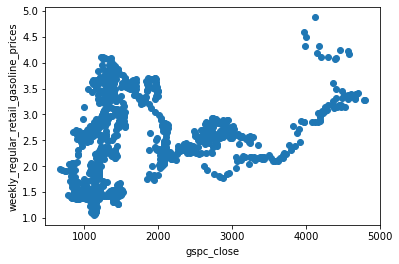

In [11]:
plt.scatter(new_data.gspc_close, new_data.weekly_regular_retail_gasoline_prices)
plt.xlabel('gspc_close')
plt.ylabel('weekly_regular_retail_gasoline_prices')
plt.show()

In [12]:
#The data in the df column must be reshaped into an array with shape (num_samples, num_features)
#https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = data_df.gspc_close.values.reshape(-1, 1)

In [13]:
X[:5]

array([[1455.22],
       [1457.6 ],
       [1401.53],
       [1394.46],
       [1424.24]])

In [14]:
# The shape of X with 1060 samples and a single feature (column)
X.shape

(1061, 1)

In [15]:
y = new_data.weekly_regular_retail_gasoline_prices

In [16]:
# Create a model with scikit-learn
#Perform linear regression with 9 columns
model = LinearRegression()

In [17]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

In [18]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(1061,)


In [19]:
df = (X, y_pred)

In [20]:
df[:5]

(array([[1455.22],
        [1457.6 ],
        [1401.53],
        ...,
        [4008.01],
        [3973.75],
        [4121.43]]),
 array([2.45305079, 2.45360418, 2.44056704, ..., 3.04661408, 3.0386481 ,
        3.07298599]))

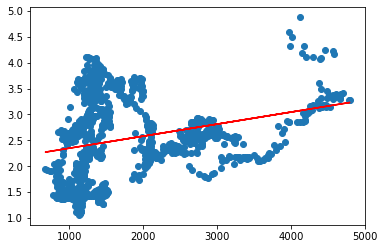

In [21]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [22]:
#The slope indicates the steepness of a line and the intercept indicates the location where it intersects an axis.
#The slope and the intercept define the linear relationship between two variables, and can be used to estimate an average rate of change.
#The greater the magnitude of the slope, the steeper the line and the greater the rate of change which means one variable is dependent of the other. 
#Examining the specific parementers of our model
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[0.00023252]
2.1146895650137174


In [23]:
#reading into variables
X = data_df.gspc_close.values.reshape(-1, 1)
y = new_data.weekly_regular_retail_gasoline_prices

In [24]:
#Split the Dataset


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 212, random_state = 100)

In [43]:
X_train.shape

(849, 1)

In [44]:
y_train.shape

(849,)

In [45]:
X_test.shape

(212, 1)

In [46]:
y_test.shape

(212,)

In [27]:
#import linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [28]:
#fitting the model
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
# Predicting the Test set results
y_pred = lr.predict(X_test)

In [30]:
#Visualisation

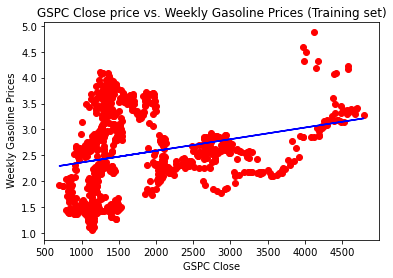

In [31]:
#traininig set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('GSPC Close price vs. Weekly Gasoline Prices (Training set)')
plt.xlabel('GSPC Close')
plt.ylabel(' Weekly Gasoline Prices')
plt.show()

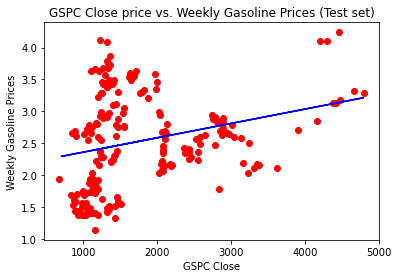

In [32]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('GSPC Close price vs. Weekly Gasoline Prices (Test set)')
plt.xlabel('GSPC Close')
plt.ylabel('Weekly Gasoline Prices')
plt.show()

Text(0.5, 0, 'Index')

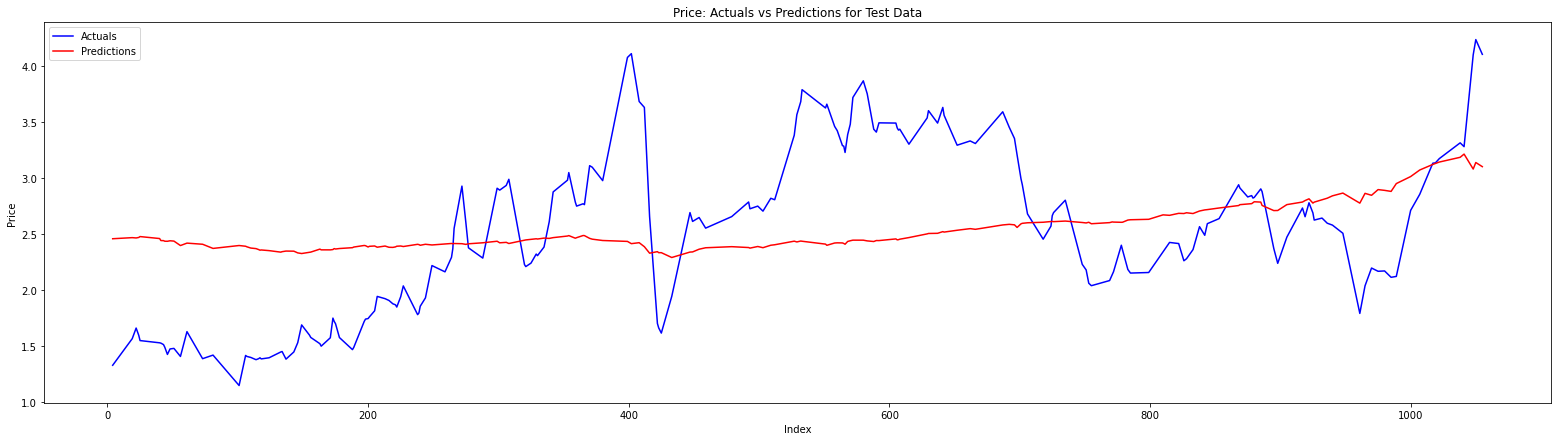

In [35]:
#actual vs predicted price on TEST DATA
fig, ax=plt.subplots(figsize=(27,7))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions for Test Data')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

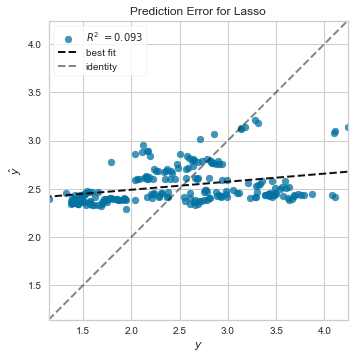

In [36]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
Lm = Lasso()
visualizer = PredictionError(Lm) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show("prediction_error.jpg")

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

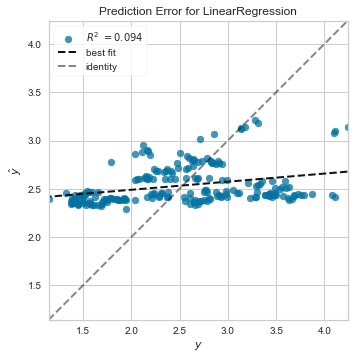

In [49]:
model1 = LinearRegression()
visualizer = PredictionError(model1)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show("prediction_error_for_Linear_Regression.jpg")

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

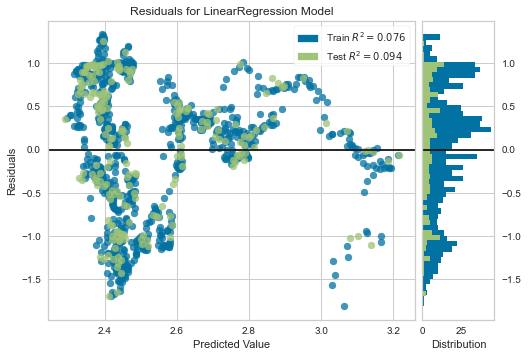

In [50]:
visualizer = ResidualsPlot(model1)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show("residuals_for_Linear_Regression.jpg")

In [53]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

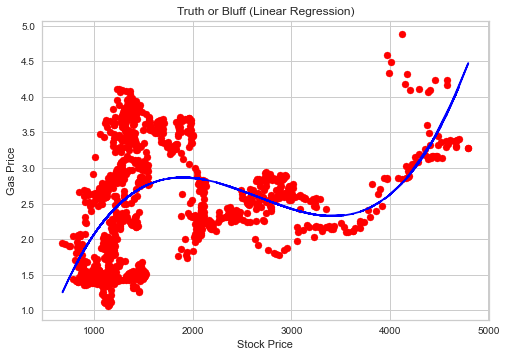

In [57]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Stock Price')
    plt.ylabel('Gas Price')
    plt.show()
    return
viz_polymonial()

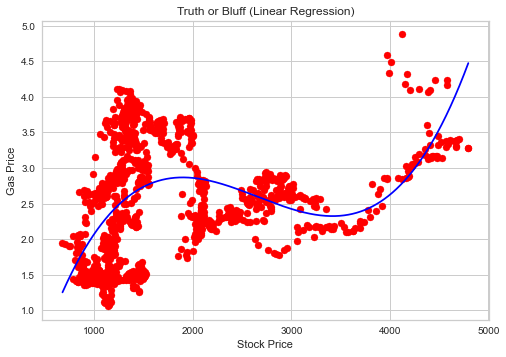

In [59]:
# Additional feature
# Making the plot line (Blue one) more smooth
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Stock Price')
    plt.ylabel('Gas Price')
    plt.show()
    return
viz_polymonial_smooth()

In [66]:
# Predicting a new result with Linear Regression
lr.predict([[1505.97]])
#The actual number is 1.503

array([2.47546889])

In [67]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[1505.97]]))


array([2.74095459])

In [ ]:
#They're both close to the mean for the weekly gas price whhich is 2.538233